In [211]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [212]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [213]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [214]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [215]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [216]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [217]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X = df.drop('target', axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [220]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(df),len(X_train),len(X_test)

(150, 120, 30)

In [222]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)

In [223]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [224]:
model.score(X_test,y_test)

0.9333333333333333

In [225]:
y_predict = model.predict(X_test)

In [226]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predict, y_test)
cm

array([[10,  0,  0],
       [ 0,  5,  1],
       [ 0,  1, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

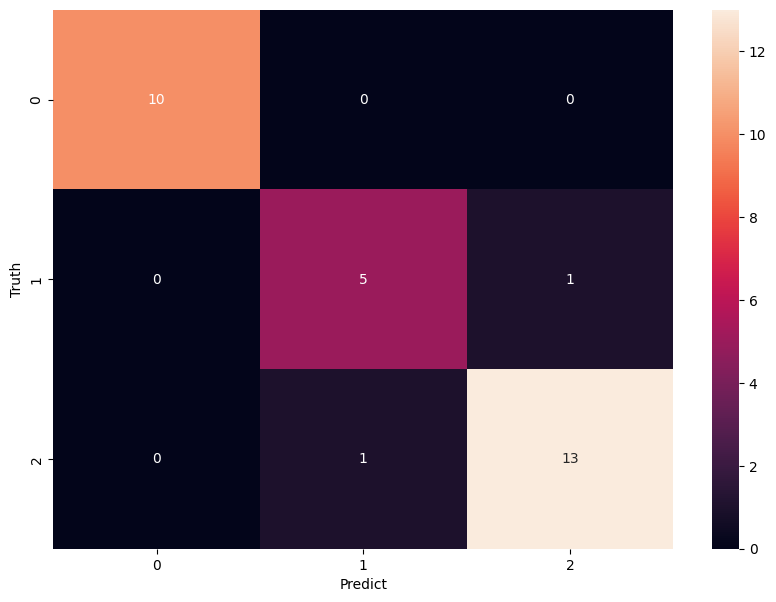

In [227]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")